#  Exploratory Data Analysis (EDA)

This notebook explores trends in student behavior and their relationship with academic performance.

## Project Objective and Overarching Question
The central question driving this project is:
**To what extent can student exam scores be predicted from lifestyle habits, wellness factors, and socioeconomic background?**

We aim to identify which features contribute most to academic performance and explore predictive models that can help estimate student outcomes.

#  Exploratory Data Analysis (EDA)

This notebook explores trends in student behavior and their relationship with academic performance.

##  Load and Preview Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


##  Summary Statistics and Data Types

We display the data types and summary statistics to understand the scale, range, and types of data we're working with.

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,909,1000,1000.000000,1000,1000.000000
unique,1000,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,392,447,NaN,682,NaN
mean,NaN,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500
std,NaN,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564
min,NaN,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000
50%,NaN,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000
75%,NaN,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000


## 🧹 Missing Values

This line checks for any missing values in each column, ensuring data completeness.

In [4]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


##  Distribution of Exam Scores

This plot shows the distribution of exam scores. A normal distribution with a right skew impacts the models performance

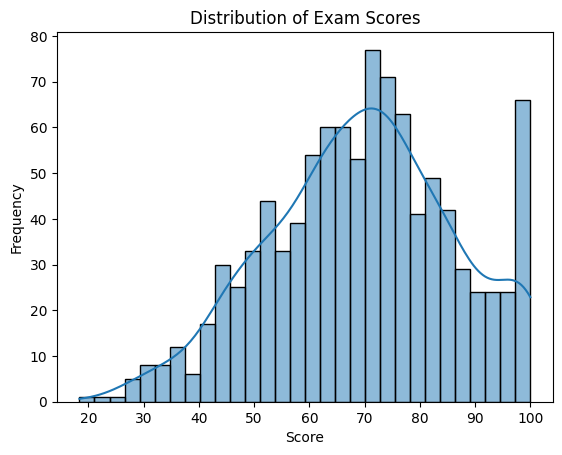

In [5]:
sns.histplot(df['exam_score'], bins=30, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## 🔗 Relationship Between Key Features

This pairplot helps us visually inspect relationships between key numeric features and exam score. We can identify patterns and correlations with study hours having the most significant impact.

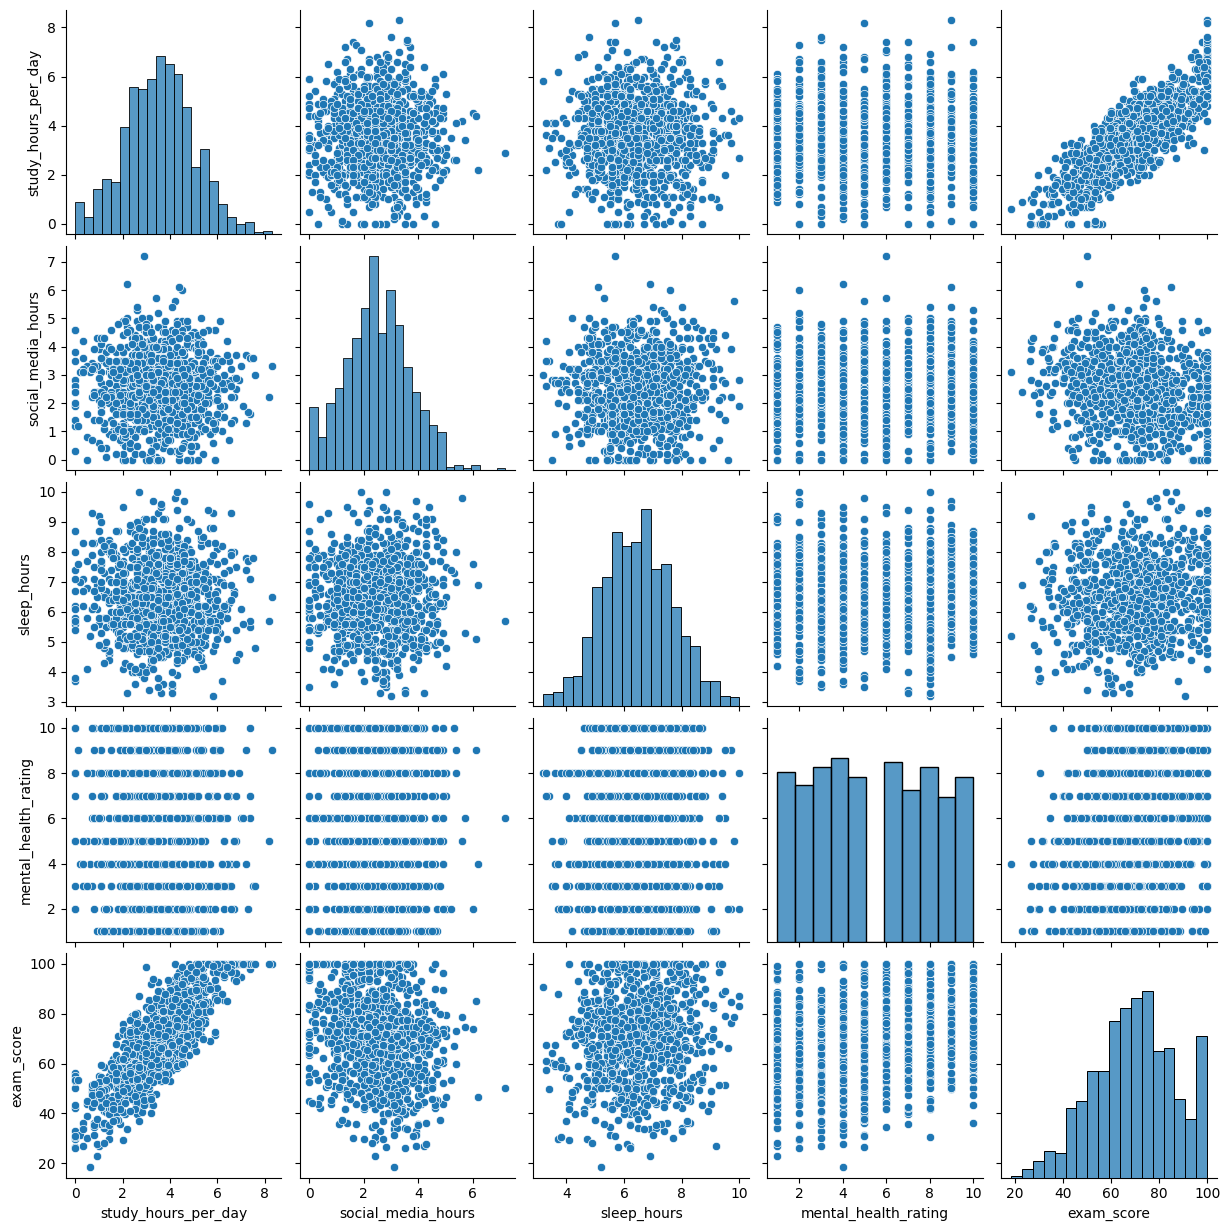

In [6]:
sns.pairplot(df[['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'mental_health_rating', 'exam_score']])
plt.show()

##  Correlation Matrix

A correlation matrix helps quantify relationships between numeric variables. Higher absolute values indicate stronger linear relationships.

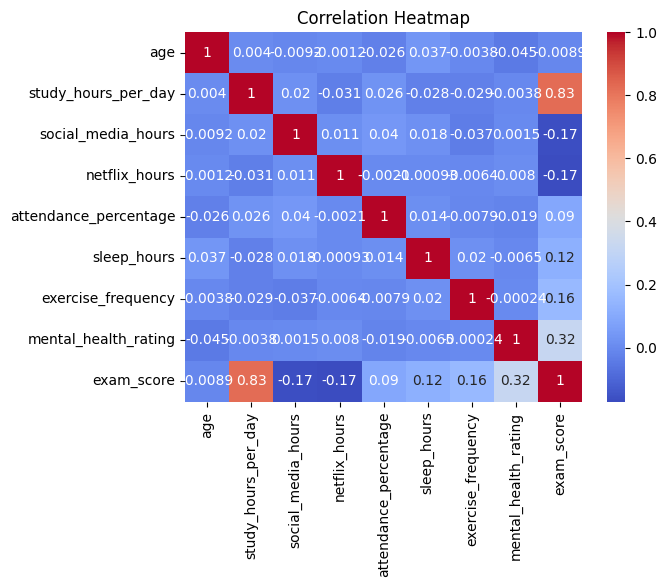

In [7]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Interpretation of the Correlation Matrix
The correlation matrix shows how strongly numerical variables are related to each other. Study hours, mental health numbers and attendance  have positive correlations with exam score , suggesting that students who study more, attend more classes, and have better mental health tend to perform better. However negative correlations like social media and netflix hours indicate a potential distraction from academics.

# Complete Exploratory Data Analysis

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('student_habits_performance.csv')

### Exploring `age and Exam Score`
**Why this metric:** We chose to analyze age and Exam Score because it may influence how students perform academically, either directly ( study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Relationship between age and Exam Score

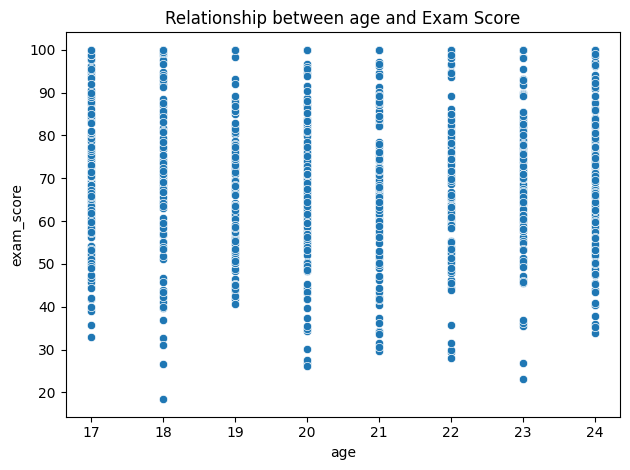

In [9]:
sns.scatterplot(data=df, x='age', y='exam_score')
plt.title('Relationship between age and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `gender`
**Why this metric:** We chose to analyze `gender` because it may influence how students perform academically, either directly (study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Exam Score by gender

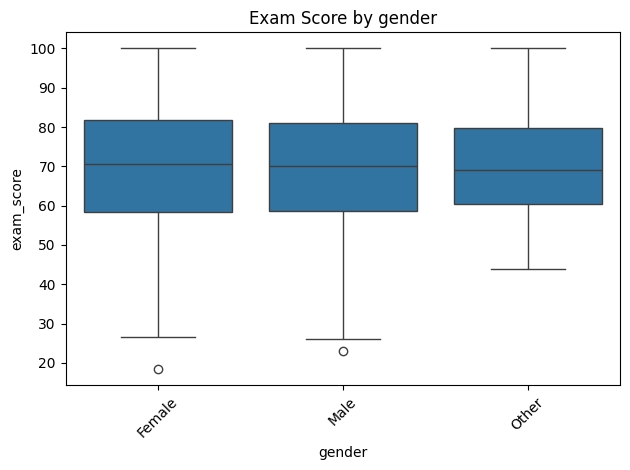

In [10]:
sns.boxplot(data=df, x='gender', y='exam_score')
plt.title('Exam Score by gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Students are grouped by `gender` and their exam scores are compared.
Boxplots help us detect which groups have higher or lower medians and if any categories have outliers that affect performance.

### Exploring `study_hours_per_day and Exam Score`
**Why this metric:** We chose to analyze study_hours_per_day and Exam Score because it may influence how students perform academically, either directly (study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.


### Relationship between study_hours_per_day and Exam Score

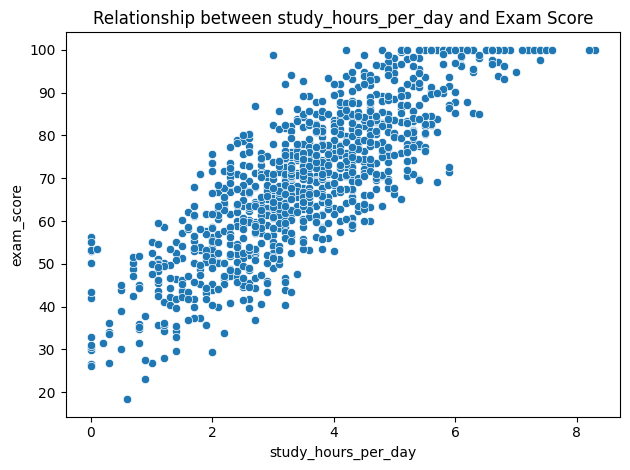

In [11]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Relationship between study_hours_per_day and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `social_media_hours and Exam Score`
**Why this metric:** We chose to analyze social_media_hours and Exam Score because it may influence how students perform academically, either directly ( study hours) or indirectly (mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Relationship between social_media_hours and Exam Score

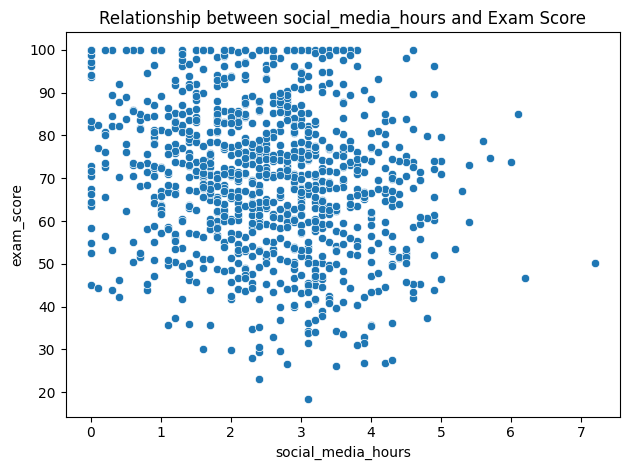

In [12]:
sns.scatterplot(data=df, x='social_media_hours', y='exam_score')
plt.title('Relationship between social_media_hours and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `netflix_hours and Exam Score`
**Why this metric:** We chose to analyze netflix_hours and Exam Score because it may influence how students perform academically, either directly ( study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.


### Relationship between netflix_hours and Exam Score

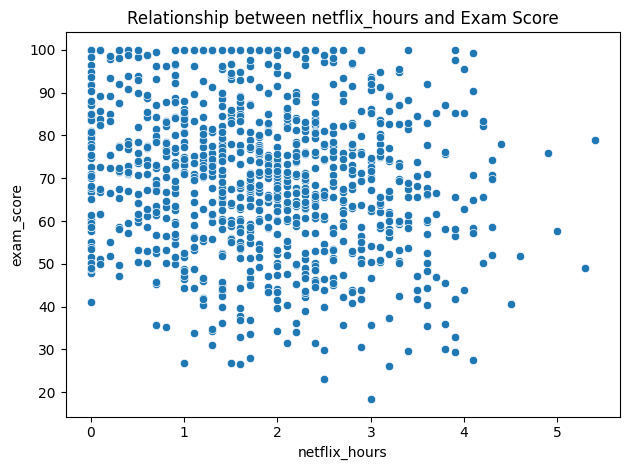

In [23]:
sns.scatterplot(data=df, x='netflix_hours', y='exam_score')
plt.title('Relationship between netflix_hours and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `part_time_job`
**Why this metric:** We chose to analyze part_time_job because it may influence how students perform academically, either directly ( study hours) or indirectly (mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Exam Score by part_time_job

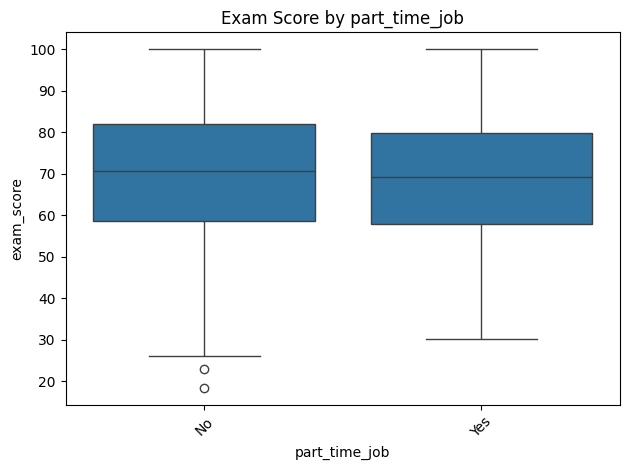

In [13]:
sns.boxplot(data=df, x='part_time_job', y='exam_score')
plt.title('Exam Score by part_time_job')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Students are grouped by `part_time_job` and their exam scores are compared.
Boxplots help us detect which groups have higher or lower medians and if any categories have outliers that affect performance.

### Exploring `attendance_percentage and Exam Score`
**Why this metric:** We chose to analyze attendance_percentage and Exam Score because it may influence how students perform academically, either directly ( study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Relationship between attendance_percentage and Exam Score

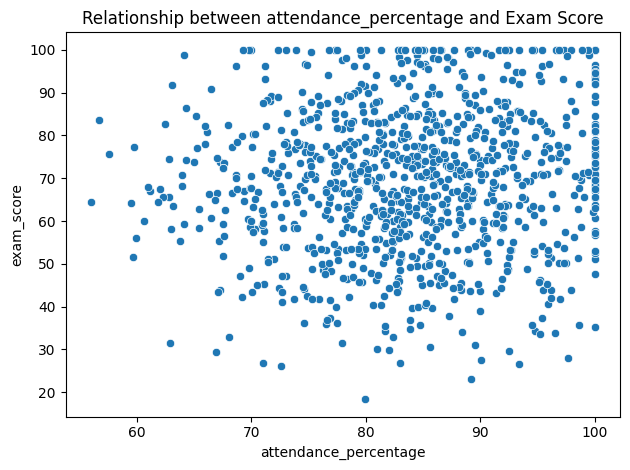

In [24]:
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score')
plt.title('Relationship between attendance_percentage and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `sleep_hours and Exam Score`
**Why this metric:** We chose to analyze sleep_hours and Exam Score because it may influence how students perform academically, either directly (study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.


### Relationship between sleep_hours and Exam Score

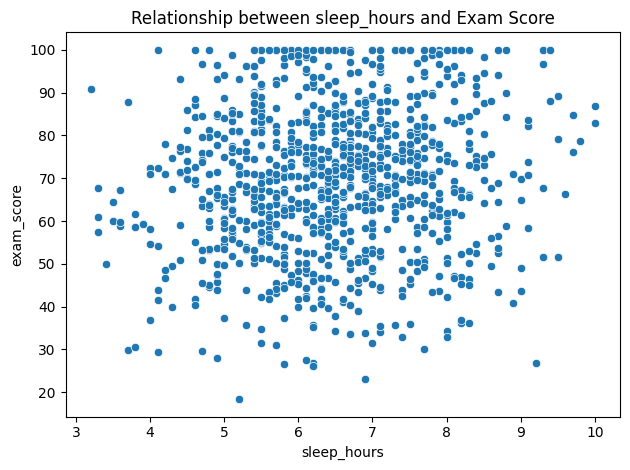

In [14]:
sns.scatterplot(data=df, x='sleep_hours', y='exam_score')
plt.title('Relationship between sleep_hours and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `diet_quality`
**Why this metric:** We chose to analyze diet_quality because it may influence how students perform academically, either directly (study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.


### Exam Score by diet_quality

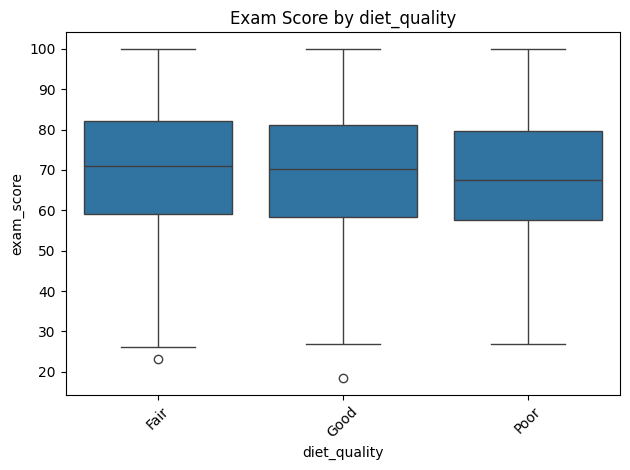

In [15]:
sns.boxplot(data=df, x='diet_quality', y='exam_score')
plt.title('Exam Score by diet_quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Students are grouped by `diet_quality` and their exam scores are compared.
Boxplots help us detect which groups have higher or lower medians and if any categories have outliers that affect performance.

### Exploring `exercise_frequency and Exam Score`
**Why this metric:** We chose to analyze exercise_frequency and Exam Score because it may influence how students perform academically, either directly  study hours) or indirectly  mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Relationship between exercise_frequency and Exam Score

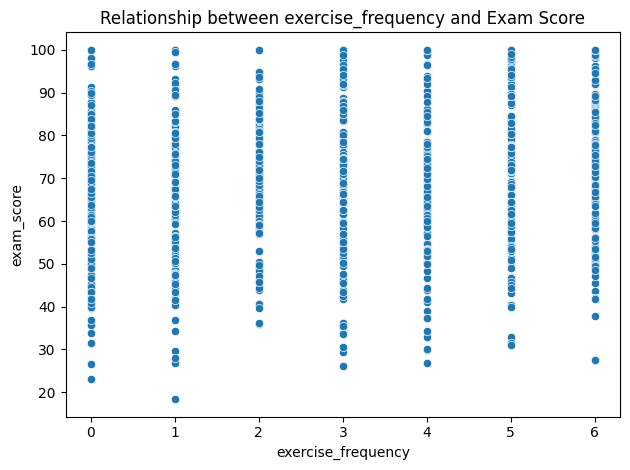

In [16]:
sns.scatterplot(data=df, x='exercise_frequency', y='exam_score')
plt.title('Relationship between exercise_frequency and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `parental_education_level`
**Why this metric:** We chose to analyze parental_education_level because it may influence how students perform academically, either directly ( study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.


### Exam Score by parental_education_level

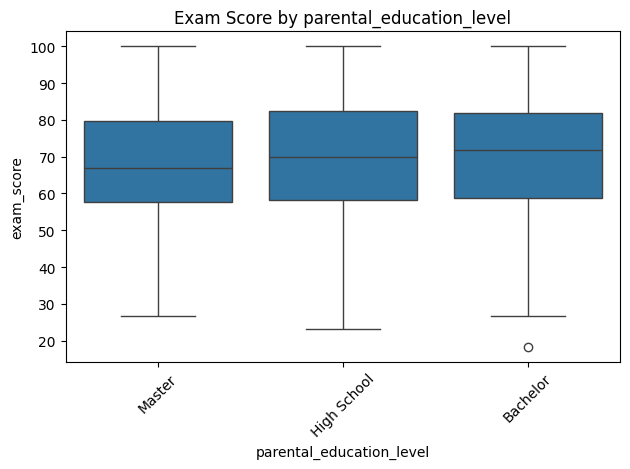

In [25]:
sns.boxplot(data=df, x='parental_education_level', y='exam_score')
plt.title('Exam Score by parental_education_level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Students are grouped by parental_education_level and their exam scores are compared.
Boxplots help us detect which groups have higher or lower medians and if any categories have outliers that affect performance.

### Exploring `internet_quality`
**Why this metric:** We chose to analyze internet_quality because it may influence how students perform academically, either directly ( study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Exam Score by internet_quality

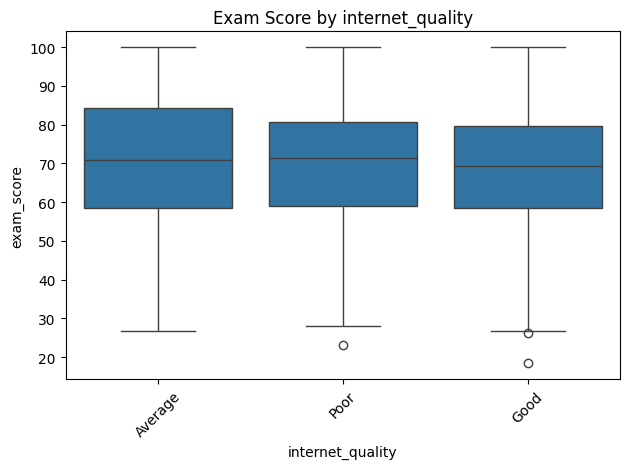

In [17]:
sns.boxplot(data=df, x='internet_quality', y='exam_score')
plt.title('Exam Score by internet_quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Students are grouped by internet_quality and their exam scores are compared.
Boxplots help us detect which groups have higher or lower medians and if any categories have outliers that affect performance.

### Exploring `mental_health_rating and Exam Score`
**Why this metric:** We chose to analyze mental_health_rating and Exam Score because it may influence how students perform academically, either directly (study hours) or indirectly ( mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.


### Relationship between mental_health_rating and Exam Score

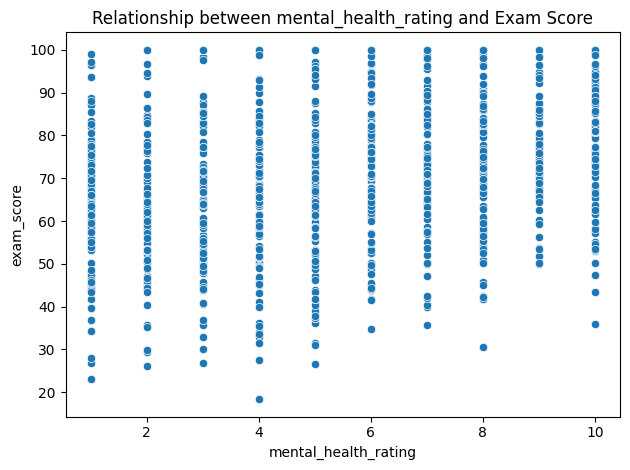

In [26]:
sns.scatterplot(data=df, x='mental_health_rating', y='exam_score')
plt.title('Relationship between mental_health_rating and Exam Score')
plt.tight_layout()
plt.show()

### Exploring `extracurricular_participation`
**Why this metric:** We chose to analyze extracurricular_participation because it may influence how students perform academically, either directly (study hours) or indirectly (mental health, diet). Understanding its relationship to exam performance can help explain what supports or hinders student success.



### Exam Score by extracurricular_participation

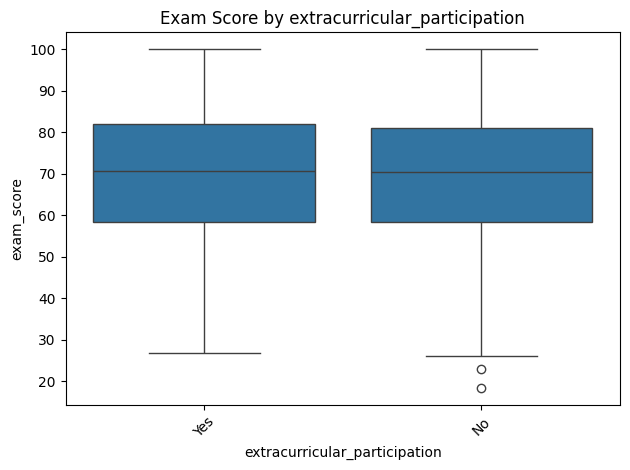

In [18]:
sns.boxplot(data=df, x='extracurricular_participation', y='exam_score')
plt.title('Exam Score by extracurricular_participation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Students are grouped by extracurricular_participation and their exam scores are compared.
Boxplots help us detect which groups have higher or lower medians and if any categories have outliers that affect performance.

## Derived Feature: Study-to-Sleep Ratio

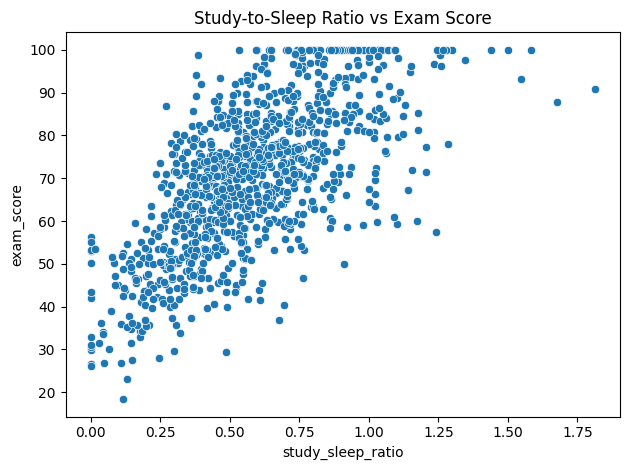

In [19]:
df['study_sleep_ratio'] = df['study_hours_per_day'] / df['sleep_hours']
sns.scatterplot(data=df, x='study_sleep_ratio', y='exam_score')
plt.title('Study-to-Sleep Ratio vs Exam Score')
plt.tight_layout()
plt.show()

## Comparing Key Feature Relationships

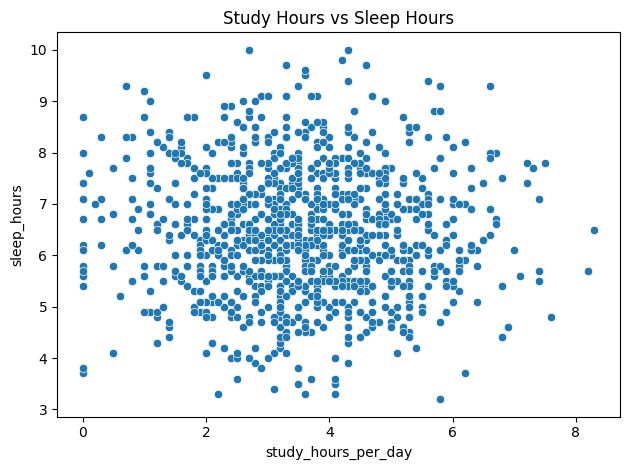

In [20]:
sns.scatterplot(data=df, x='study_hours_per_day', y='sleep_hours')
plt.title('Study Hours vs Sleep Hours')
plt.tight_layout()
plt.show()

- This comparison shows whether students who study more tend to sleep less. We expect a negative trend. It helps us understand tradeoffs in student routines.

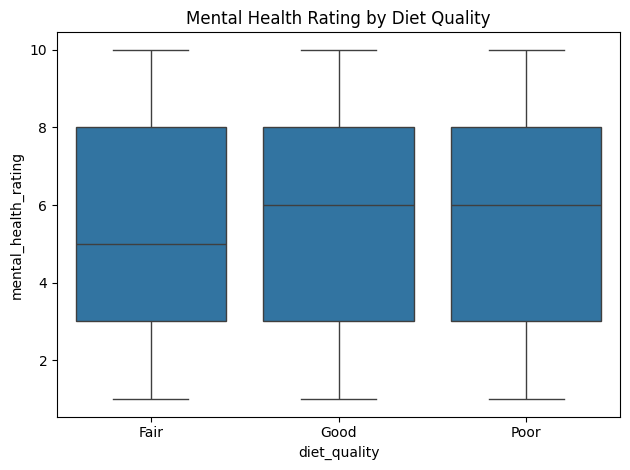

In [21]:
sns.boxplot(data=df, x='diet_quality', y='mental_health_rating')
plt.title('Mental Health Rating by Diet Quality')
plt.tight_layout()
plt.show()

- A student’s diet may affect how they feel mentally. This boxplot explores whether students with better diets report better mental health.

## Correlation Matrix

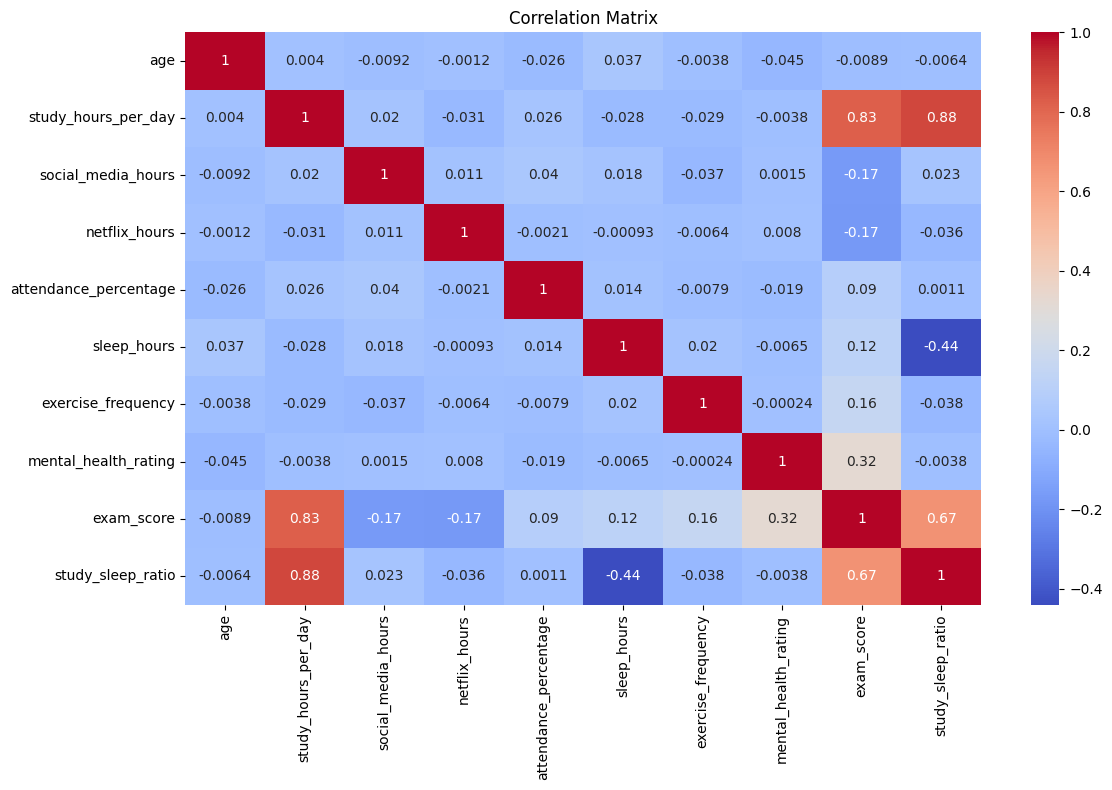

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

- This matrix highlights which numeric features are most positively or negatively associated with exam score.

## Final EDA Summary
- Most predictive features: study_hours_per_day, attendance_percentage, mental_health_rating.
- Weak predictors: social_media_hours, netflix_hours.
- Feature interactions (like sleep vs study) show real-world tradeoffs in behavior.
- Categorical trends (diet, extracurriculars) consistently favor healthy, involved students.
This analysis gives strong grounding for model selection and confirms that wellness and behavior matter as much as academic inputs.